**Problem 2: Regresija** [20p]
U arhivi se nalazi skup podataka bottle.csv koji sadrži podatke o raznim ispitivanjima vode
iz okeana. Nas zanima veza saliniteta i temperature vode. Više informacija o skupu
podataka možete naći ovde. Cilj je predvideti temperaturu vode u odnosu na salinitet

**a.** [10p] U fajlu 2a.py na ovom skupu podataka primeniti polinomijalnu regresiju, uz
variranje stepena polinoma u intervalu [1, 6]. Pokretanje programa treba da
proizvede dva grafika: jedan na kome su u 2D prikazani svi podaci iz skupa kao i svih
6 regresionih krivih, i drugi na kome je prikazana zavisnost finalne funkcije troška na
celom skupu (ne u poslednjoj epohi treninga!) od stepena polinoma. Šta možemo
primetiti? Diskutovati u komentaru ispod koda.

**b.** [10p] U fajlu 2b.py trenirati polinomijalnu regresiju sa fiksnim stepenom polinoma 4,
ali uz dodatu L2 regularizaciju. Za parametar lambda probati vrednosti iz skupa {0,
0.001, 0.01, 0.1, 1, 10, 100}. U redu je krenuti od kompletne kopije prethodnog fajla.
Pokretanje programa treba da kreira dva grafika slična onima u prethodnom delu
problema: grafik svih podataka sa 7 regresionih krivih (za različite vrednosti lambda) i
grafik zavisnosti finalne funkcije troška na celom skupu od parametra lambda. Šta
sada možemo primetiti? Diskutovati u komentaru ispod koda. Trazimo T_degC,Salnty



Polynomial Degree: 1
w = [-0.9423571], bias = 0.08178660273551941
Polynomial Degree: 2
w = [-0.9999045 -0.2672323], bias = 0.39977797865867615
Polynomial Degree: 3
w = [-1.2157434  -0.21659485  0.14625944], bias = 0.36870166659355164
Polynomial Degree: 4
w = [-1.1825068  -0.0780755   0.11868231 -0.03938252], bias = 0.3096802532672882
Polynomial Degree: 5
w = [-1.2447795  -0.05040224  0.23468655 -0.06554627 -0.04258577], bias = 0.3062402307987213
Polynomial Degree: 6
w = [-1.1897172   0.15236568  0.11793955 -0.32955262  0.00659156  0.09745982], bias = 0.2765510082244873


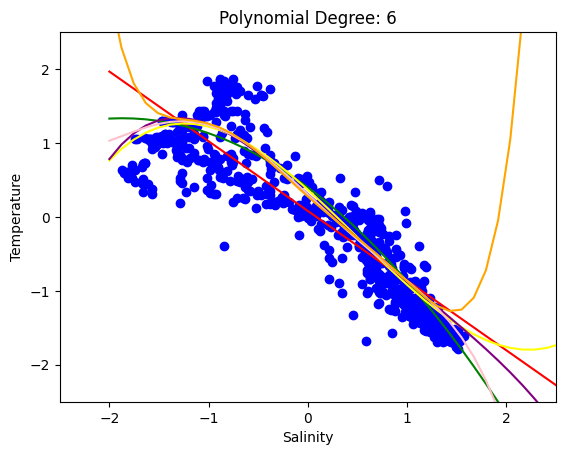

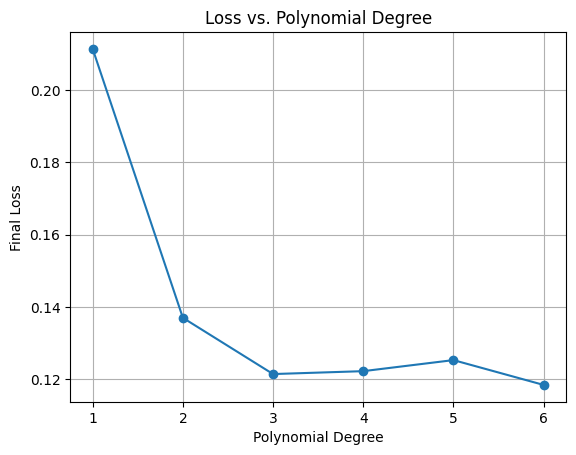

In [ ]:
import matplotlib.pyplot as plot
import pandas as pd
import numpy as np
import tensorflow as tf

filename = "bottle.csv"
colors = ["red", "green", "yellow", "purple", "pink", "orange"]
all_data = np.genfromtxt(filename, delimiter=',', skip_header=1, usecols=(5, 6), dtype='float32')

valid_rows_mask = ~np.isnan(all_data).any(axis=1)
filtered_data = all_data[valid_rows_mask]

if len(filtered_data) > 700:
    filtered_data = filtered_data[:700]
elif len(filtered_data) < 700:
    remaining_rows = 700 - len(filtered_data)
    additional_data = np.genfromtxt(filename, delimiter=',', skip_header=len(all_data) - remaining_rows,
                                    usecols=(5, 6), dtype='float32')
    filtered_data = np.concatenate((filtered_data, additional_data), axis=0)

sample_data = filtered_data[:30]

data = dict()
data["x"] = filtered_data[:, 1]
data["y"] = filtered_data[:, 0]

data['x'] = (data['x'] - np.mean(data['x'], axis=0)) / np.std(data['x'], axis=0)
data['y'] = (data['y'] - np.mean(data['y'])) / np.std(data['y'])

def create_feature_matrix(x, nb_features):
    tmp_features = []
    for deg in range(1, nb_features + 1):
        tmp_features.append(np.power(x, deg))
    return np.column_stack(tmp_features)

nb_samples = data['x'].shape[0]

learning_rate = 0.001
number_of_epochs = 100

def predict(x, w, b):
    w_col = tf.reshape(w, (nb_features, 1))
    hypothesis = tf.add(tf.matmul(x, w_col), b)
    return hypothesis

def train_step(x, y, weight, bias):
    w_grad, b_grad, loss_val = calc_grad(x, y, weight, bias)
    adam.apply_gradients(zip([w_grad, b_grad], [weight, bias]))
    return loss_val


def loss(x, y, weight, bias):
    prediction = predict(x, weight, bias)
    y_column = tf.reshape(y, (-1, 1))
    mse = tf.reduce_mean(tf.square(prediction - y_column))
    return mse

def calc_grad(x, y, weight, bias):
    with tf.GradientTape() as tape:
        loss_val = loss(x, y, weight, bias)
    w_grad, b_grad = tape.gradient(loss_val, [weight, bias])
    return w_grad, b_grad, loss_val

losses = []  # List to store losses for different degrees

for nb_features in range(1, 7):
    print(f"Polynomial Degree: {nb_features}")
    data['x_poly'] = create_feature_matrix(data['x'], nb_features)

    weight = tf.Variable(tf.zeros(nb_features))
    bias = tf.Variable(0.0)

    adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    for epoch in range(number_of_epochs):
        epoch_loss = 0
        for sample in range(nb_samples):
            x = data["x_poly"][sample].reshape((1, nb_features))
            y = data["y"][sample]

            curr_loss = train_step(x, y, weight, bias)
            epoch_loss += curr_loss
        epoch_loss /= nb_samples

    losses.append(epoch_loss.numpy())  # Append the final loss after training

    print(f'w = {weight.numpy()}, bias = {bias.numpy()}')

    xs = create_feature_matrix(np.linspace(-2, 4, 50, dtype='float32'), nb_features)
    hyp_val = predict(xs, weight, bias)
    plot.plot(xs[:, 0].tolist(), hyp_val.numpy().tolist(), color=colors[nb_features-1])

plot.scatter(data['x'], data['y'], color='blue', label='Data Points')
plot.xlabel('Salinity')
plot.ylabel('Temperature')
plot.title(f'Polynomial Degree: {nb_features}')
plot.xlim([-2.5, 2.5])
plot.ylim([-2.5, 2.5])
plot.show()

# Plotting the loss vs. polynomial degree
plot.figure()
degrees = range(1, 7)
plot.plot(degrees, losses, marker='o')
plot.xlabel('Polynomial Degree')
plot.ylabel('Final Loss')
plot.title('Loss vs. Polynomial Degree')
plot.xticks(degrees)
plot.grid(True)
plot.show()


Na osnovu gornja 2 grafikona vidimo da sledeca situacija:
Polinom 1-og stepena izgleda kao obicna linearna regresija
Polinom 2-og do 5-og stepena izgledaju poprilicno isto po nacinu zakrivljenja
Polinom 6-og stepan pocinje da pravi neke "luda" zakrivljenja za koje mozemo reci da su zapravo poslijedica overfittinga
Napomena ove zakljucke donosimo na osnovu izgleda grafika
Na osnovu donjeg grafika i debug/finalnog ispisa dolazimo do slijedeceg zakljucka:
Polinom 1-og stepena donosi najvecu gresku
Od 1-og od 3-eg stepena kumulativni trosak se smanjuje i grafik izgleda kao lakat
Od 3-eg pa nadalje greska odokativno receno na osnovu grafika i loss ispisa zapravo stagnira
Na kraju mozemo zakljuciti da je polinomijalna funkcija 3-eg stepena najbolji izbor cijene trosenja vremena i kvaliteta kao finalnog rezultata